<a href="https://colab.research.google.com/github/adithya36/Used_Cars_Price_Prediction/blob/main/cars_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import
*   libraries
*   drive
*   df

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns

!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:
import matplotlib.pyplot as plt
!pip install plotly
!pip install cufflinks
import plotly.express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`



In [ ]:
!pip install geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("filepath_or_buffer", index_col=None)
#df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv", index_col=0)
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cars.csv")

df1: **cars.csv**
*   describe
*   clean





In [ ]:
df = df2

In [ ]:
#get number of rows & cols
df.shape

(38531, 30)

In [ ]:
#get number of elements
df.size

1155930

In [ ]:
#get head
df.head(n=5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [ ]:
#get descriptive stats
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [ ]:
#get sum nan
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [ ]:
#get sum non nan
df.notnull().sum()

manufacturer_name    38531
model_name           38531
transmission         38531
color                38531
odometer_value       38531
year_produced        38531
engine_fuel          38531
engine_has_gas       38531
engine_type          38531
engine_capacity      38521
body_type            38531
has_warranty         38531
state                38531
drivetrain           38531
price_usd            38531
is_exchangeable      38531
location_region      38531
number_of_photos     38531
up_counter           38531
feature_0            38531
feature_1            38531
feature_2            38531
feature_3            38531
feature_4            38531
feature_5            38531
feature_6            38531
feature_7            38531
feature_8            38531
feature_9            38531
duration_listed      38531
dtype: int64

In [ ]:
#remove duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(38491, 30)

In [ ]:
#change col names
df = df.rename(columns={'year_produced': 'year', 'price_usd': 'price','manufacturer_name	': 'manufacturer','engine_fuel' : 'fuel','transmission':'gear','odometer_value':'odometer'})
df.head()

,manufacturer_name,model_name,gear,color,odometer,year,fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [ ]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

50000.0
1.0
6632.809226832238
4800.0


                  odometer      year  ...  feature_9  duration_listed
odometer          1.000000 -0.487104  ...  -0.089626        -0.001519
year             -0.487104  1.000000  ...   0.249740        -0.015877
engine_has_gas    0.057561 -0.074460  ...  -0.006030         0.018133
engine_capacity   0.104807  0.006144  ...   0.245394         0.079740
has_warranty     -0.182399  0.201642  ...  -0.088888        -0.058830
price            -0.419871  0.704930  ...   0.267831         0.034452
is_exchangeable   0.044549 -0.060353  ...   0.032613         0.027747
number_of_photos -0.142429  0.257071  ...   0.133164        -0.027725
up_counter       -0.021483  0.008482  ...   0.036886         0.698106
feature_0         0.108909 -0.350971  ...  -0.638299        -0.067980
feature_1        -0.153161  0.427844  ...   0.395772         0.099308
feature_2        -0.077026  0.206194  ...   0.373465         0.049641
feature_3        -0.230142  0.432954  ...   0.377930         0.038078
feature_4        -0.

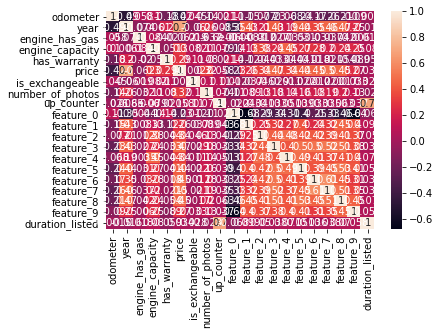

In [ ]:
#corr matrix
df = df.dropna()
print(df.corr())
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#corr p-value
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
calculate_pvalues(df)

,odometer,year,engine_has_gas,engine_capacity,has_warranty,price,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
odometer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7657
year,0,0,0,0.2281,0,0,0,0,0.0961,0,0,0,0,0,0,0,0,0,0,0.0018
engine_has_gas,0,0,0,0,0.0001,0,0.0002,0,0.999,0.3909,0.1045,0.0175,0,0.498,0,0,0,0,0.2368,0.0004
engine_capacity,0,0.2281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
has_warranty,0,0,0.0001,0,0,0,0,0,0,0,0,0,0,0,0,0.0004,0,0,0,0
price,0,0,0,0,0,0,0.6728,0,0,0,0,0,0,0,0,0,0,0,0,0
is_exchangeable,0,0,0.0002,0,0,0.6728,0,0,0,0.0203,0,0,0,0.032,0,0.8097,0,0.7434,0,0
number_of_photos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
up_counter,0,0.0961,0.999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
feature_0,0,0,0.3909,0,0,0,0.0203,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df[df['price'] >=50] 
df.pivot_table(values='price', index='manufacturer_name',aggfunc=[np.mean, np.median, np.max, np.min])

,mean,median,amax,amin
,price,price,price,price
manufacturer_name,,,,
Acura,12772.885909,12024.500,36500.00,2350.00
Alfa Romeo,2688.550097,2000.000,22000.00,104.33
Audi,7154.944923,5330.790,46750.00,130.00
BMW,9535.751112,6750.000,50000.00,200.00
Buick,12876.319149,12300.000,24000.00,5300.00
Cadillac,11093.124651,9100.000,25750.00,1700.00
Chery,4545.978103,3750.000,16077.02,1250.00
Chevrolet,8863.759885,8300.000,49900.00,800.00


manufacturer_name
Acura            12772.885909
Alfa Romeo        2688.550097
Audi              7154.944923
BMW               9535.751112
Buick            12876.319149
Cadillac         11093.124651
Chery             4545.978103
Chevrolet         8863.759885
Chrysler          4995.491780
Citroen           4435.325516
Dacia             5342.751525
Daewoo            1576.608733
Dodge             5608.011953
Fiat              2983.380889
Ford              4997.677323
Geely             7769.232535
Great Wall        6423.760278
Honda             6515.096474
Hyundai           7926.190394
Infiniti         13794.604938
Iveco            10052.317122
Jaguar           17813.000000
Jeep             10912.489439
Kia               8156.095526
LADA              7598.681370
Lancia            2901.508370
Land Rover       15195.300380
Lexus            17130.560845
Lifan             8280.536170
Lincoln           9737.472222
Mazda             4735.091929
Mercedes-Benz     9394.015818
Mini             13133

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



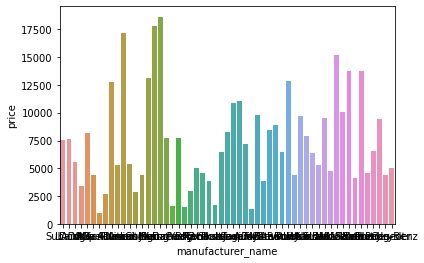

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer_name', as_index=True)['price'].mean())
plt2 = sns.barplot('manufacturer_name', 'price', data=df, ci=False)

manufacturer_name
Acura            12772.885909
Alfa Romeo        2688.550097
Audi              7154.944923
BMW               9535.751112
Buick            12876.319149
Cadillac         11093.124651
Chery             4545.978103
Chevrolet         8863.759885
Chrysler          4995.491780
Citroen           4435.325516
Dacia             5342.751525
Daewoo            1576.608733
Dodge             5608.011953
Fiat              2983.380889
Ford              4997.677323
Geely             7769.232535
Great Wall        6423.760278
Honda             6515.096474
Hyundai           7926.190394
Infiniti         13794.604938
Iveco            10052.317122
Jaguar           17813.000000
Jeep             10912.489439
Kia               8156.095526
LADA              7598.681370
Lancia            2901.508370
Land Rover       15195.300380
Lexus            17130.560845
Lifan             8280.536170
Lincoln           9737.472222
Mazda             4735.091929
Mercedes-Benz     9394.015818
Mini             13133

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



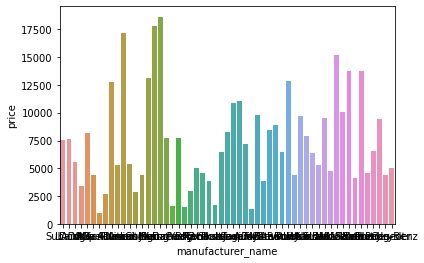

In [ ]:
#distribution bar chart --> manufacturer/ASP
print(df.groupby('manufacturer_name', as_index=True)['price'].mean()) 
plt2 = sns.barplot('manufacturer_name', 'price', data=df, ci=False)

In [ ]:
#drop columns
#keep: fuel, gear, year, odometer, price, manufacturer
df = df.drop(['model_name', 'color','engine_has_gas','engine_type','engine_capacity','body_type','has_warranty','state','drivetrain','is_exchangeable','location_region','number_of_photos','up_counter','duration_listed','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
df.head()

,manufacturer_name,gear,odometer,year,fuel,price
0,Subaru,automatic,190000,2010,gasoline,10900.00
1,Subaru,automatic,290000,2002,gasoline,5000.00
2,Subaru,automatic,402000,2001,gasoline,2800.00
3,Subaru,mechanical,10000,1999,gasoline,9999.00
4,Subaru,automatic,280000,2001,gasoline,2134.11


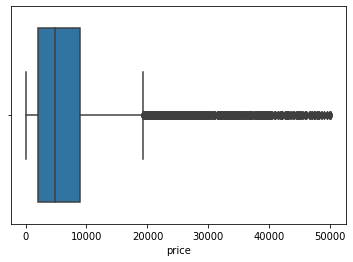

In [ ]:
#detect and remove outliers
sns.boxplot(x=df['price'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

odometer    166900.0
year            11.0
price         6850.0
dtype: float64


In [ ]:
print(df < (Q1 - 1.5 * IQR))

        fuel   gear  manufacturer_name  odometer  price   year
0      False  False              False     False  False  False
1      False  False              False     False  False  False
2      False  False              False     False  False  False
3      False  False              False     False  False  False
4      False  False              False     False  False  False
...      ...    ...                ...       ...    ...    ...
38526  False  False              False     False  False  False
38527  False  False              False     False  False  False
38528  False  False              False     False  False  False
38529  False  False              False     False  False  False
38530  False  False              False     False  False  False

[38473 rows x 6 columns]


In [ ]:
print(df > (Q3 + 1.5 * IQR))

        fuel   gear  manufacturer_name  odometer  price   year
0      False  False              False     False  False  False
1      False  False              False     False  False  False
2      False  False              False     False  False  False
3      False  False              False     False  False  False
4      False  False              False     False  False  False
...      ...    ...                ...       ...    ...    ...
38526  False  False              False     False  False  False
38527  False  False              False     False  False  False
38528  False  False              False      True  False  False
38529  False  False              False     False  False  False
38530  False  False              False     False  False  False

[38473 rows x 6 columns]


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_out.shape

(35935, 6)

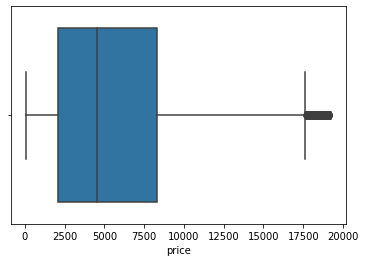

In [ ]:
sns.boxplot(x=df_out['price'])

   manufacturer_name         price
0              Acura  10482.829821
1         Alfa Romeo   2611.264216
2               Audi   6256.381540
3                BMW   7229.801890
4              Buick  12265.613636
5           Cadillac   9507.941316
6              Chery   4545.978103
7          Chevrolet   8180.587440
8           Chrysler   4773.579727
9            Citroen   4439.627345
10             Dacia   5409.005862
11            Daewoo   1591.195092
12             Dodge   4831.672163
13              Fiat   2813.970799
14              Ford   4774.570708
15             Geely   6785.068788
16        Great Wall   6423.760278
17             Honda   6073.908266
18           Hyundai   7050.845866
19          Infiniti  11069.076923
20             Iveco   7990.382929
21            Jaguar   8911.612903
22              Jeep   8206.392688
23               Kia   7474.734450
24              LADA   7751.455105
25            Lancia   2901.508370
26        Land Rover   9927.418030
27             Lexus

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



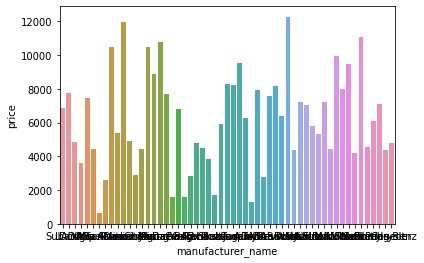

In [ ]:
print(df_out.groupby('manufacturer_name', as_index=False)['price'].mean())
plt2 = sns.barplot('manufacturer_name', 'price', data=df_out, ci=False)

In [ ]:
print(df_out['price'].max())
print(df_out['price'].min())
print(df_out['price'].mean())
print(df_out['price'].median())

19200.0
60.0
5708.841573674692
4500.0


In [ ]:
#get final info
df = df_out
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35935 entries, 0 to 38530
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  35935 non-null  object 
 1   gear               35935 non-null  object 
 2   odometer           35935 non-null  int64  
 3   year               35935 non-null  int64  
 4   fuel               35935 non-null  object 
 5   price              35935 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [ ]:
df['country'] = 'Belarus'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35935 entries, 0 to 38530
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  35935 non-null  object 
 1   gear               35935 non-null  object 
 2   odometer           35935 non-null  int64  
 3   year               35935 non-null  int64  
 4   fuel               35935 non-null  object 
 5   price              35935 non-null  float64
 6   country            35935 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.4+ MB


In [ ]:
df['gear'] = df['gear'].replace('mechanical','manual')
df['gear'].unique()

array(['automatic', 'manual'], dtype=object)

In [ ]:
df['fuel'].unique()

array(['gasoline', 'gas', 'diesel', 'hybrid-petrol', 'hybrid-diesel'],
      dtype=object)

In [ ]:
df['manufacturer_name'] = df['manufacturer_name'].str.lower()
df['manufacturer_name'].unique()

array(['subaru', 'lada', 'dodge', 'уаз', 'kia', 'opel', 'москвич',
       'alfa romeo', 'acura', 'dacia', 'lexus', 'mitsubishi', 'lancia',
       'citroen', 'mini', 'jaguar', 'porsche', 'ssangyong', 'daewoo',
       'geely', 'ваз', 'fiat', 'ford', 'renault', 'seat', 'rover',
       'volkswagen', 'lifan', 'jeep', 'cadillac', 'audi', 'заз', 'toyota',
       'газ', 'volvo', 'chevrolet', 'great wall', 'buick', 'pontiac',
       'lincoln', 'hyundai', 'nissan', 'suzuki', 'bmw', 'mazda',
       'land rover', 'iveco', 'skoda', 'saab', 'infiniti', 'chery',
       'honda', 'mercedes-benz', 'peugeot', 'chrysler'], dtype=object)

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/data/cars_clean.csv', index = False)